# Regression For Geely Auto

Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

We will be to the analysis to understand the factors on which pricing of car depends.<br>
Let's try to dig below required insites from given data:<br>
1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

### 1. Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Importing Data

In [2]:
car_data = pd.read_csv('CarPrice_Assignment.csv')
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 2.1 Understanding Data

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

There are no missing values as per the info.

In [4]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


For all the numerical features, mean and median are relatively nearby. This reduces the chance of outliers.

In [5]:
car_data.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corolla,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


As per data dictionary `symboling` shows the risk factor and is a categorical variable. `CarName` has high no. of unique categories.

In [6]:
car_data.shape

(205, 26)

#### 2.2 Cleaning the data

In [7]:
#Converting carID and Symboling feature to categorical
car_data['symboling'] = car_data['symboling'].astype('str')
car_data['car_ID'] = car_data['car_ID'].astype('str')

In [8]:
#Extracting company name from car name
car_data['company'] = car_data['CarName'].str.split(" ").str[0]

In [9]:
#Dropping Original CarName column
car_data.drop('CarName',axis=1,inplace=True)

In [10]:
car_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
#Check for no. of Categories
car_data['company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
vw              2
maxda           2
Nissan          1
toyouta         1
vokswagen       1
porcshce        1
mercury         1
Name: company, dtype: int64

There are same company names with different spells.

In [12]:
#Correcting same companies with different names
car_data.loc[car_data['company']=='toyouta','company'] = 'toyota'
car_data.loc[car_data['company']=='Nissan','company'] = 'nissan'
car_data.loc[car_data['company']=='maxda','company'] = 'mazda'
car_data.loc[car_data['company']=='vw','company'] = 'volkswagen'
car_data.loc[car_data['company']=='vokswagen','company'] = 'volkswagen'
car_data.loc[car_data['company']=='porcshce','company'] = 'porsche'

### 3. Visualizing Data

Correlation plot between all numerical variable

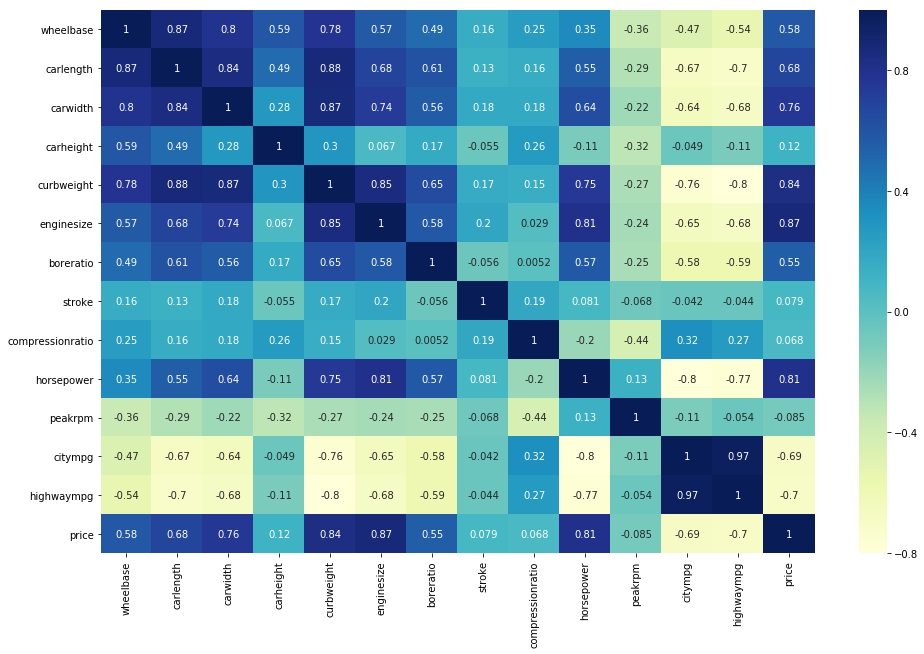

In [13]:
#Heat map of correlation metrix
plt.figure(figsize = (16, 10))
sns.heatmap(car_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Pair plot between highly correlated variables to check visually.

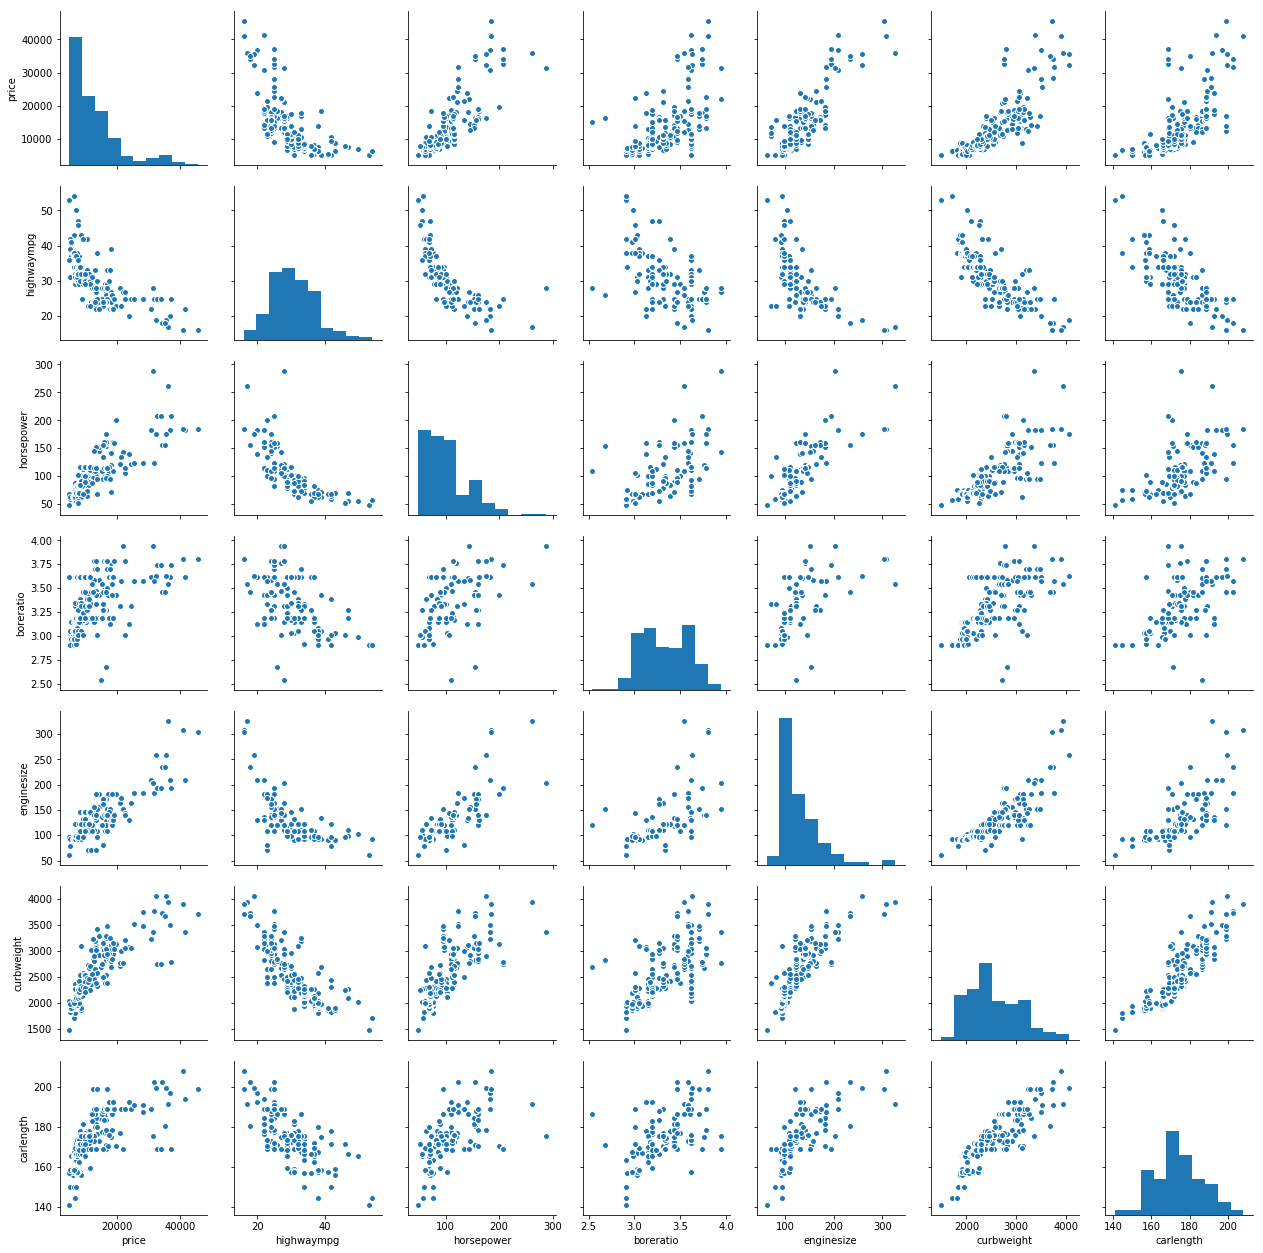

In [14]:
sns.pairplot(car_data[['price','highwaympg','horsepower','boreratio','enginesize','curbweight','carlength']])
plt.show()

Insights on categorical variable

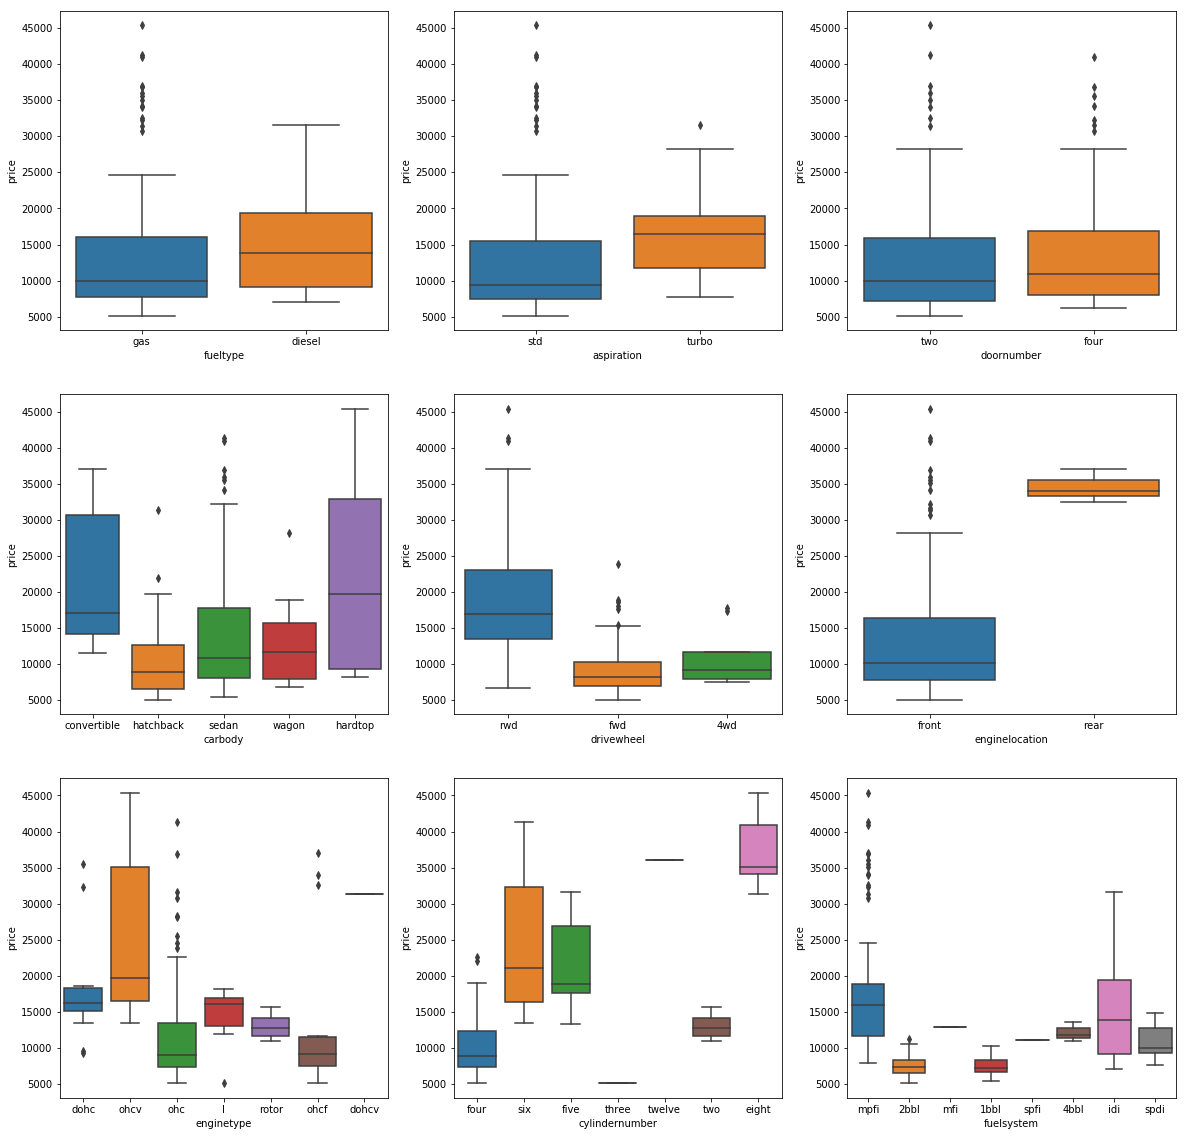

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_data)
plt.show()

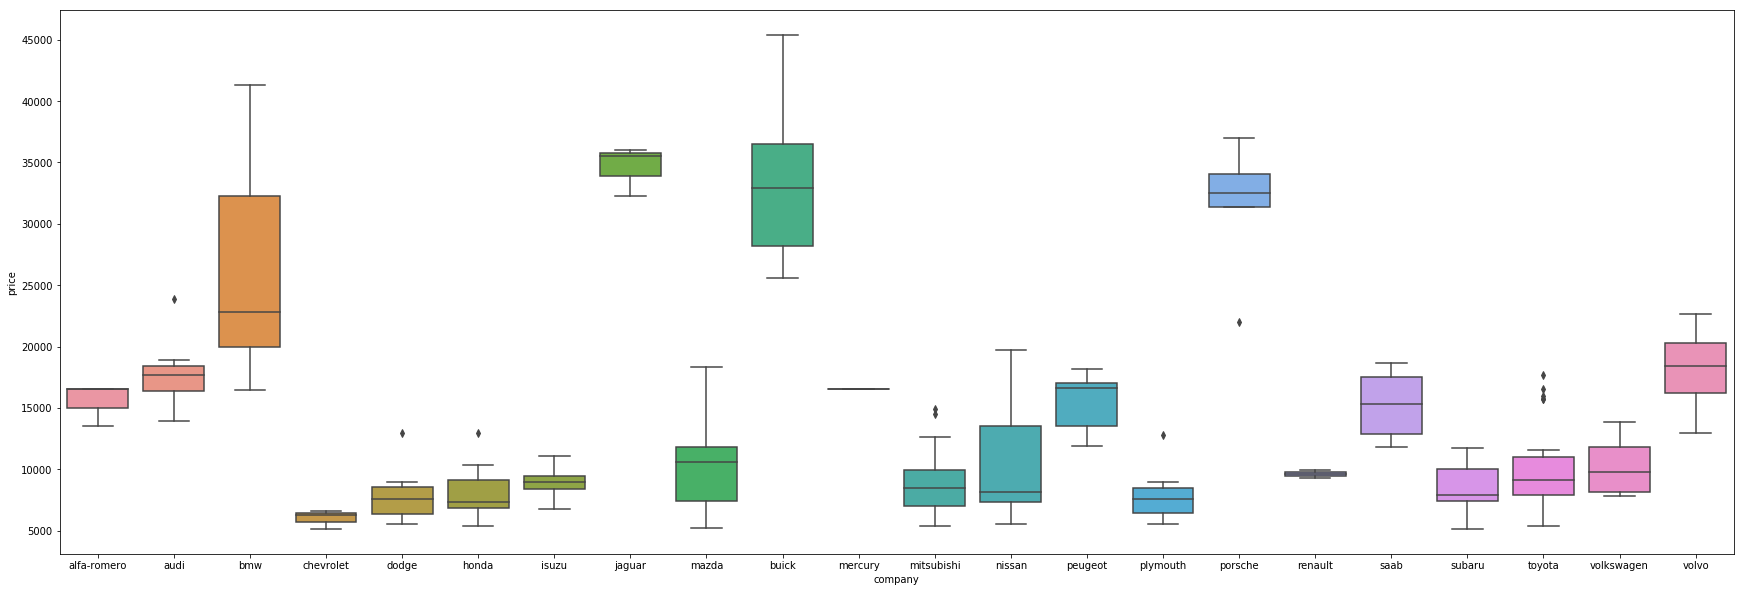

In [16]:
#Price range for all companies
plt.figure(figsize=(30, 10))
sns.boxplot(x = 'company', y = 'price', data = car_data)
plt.show()

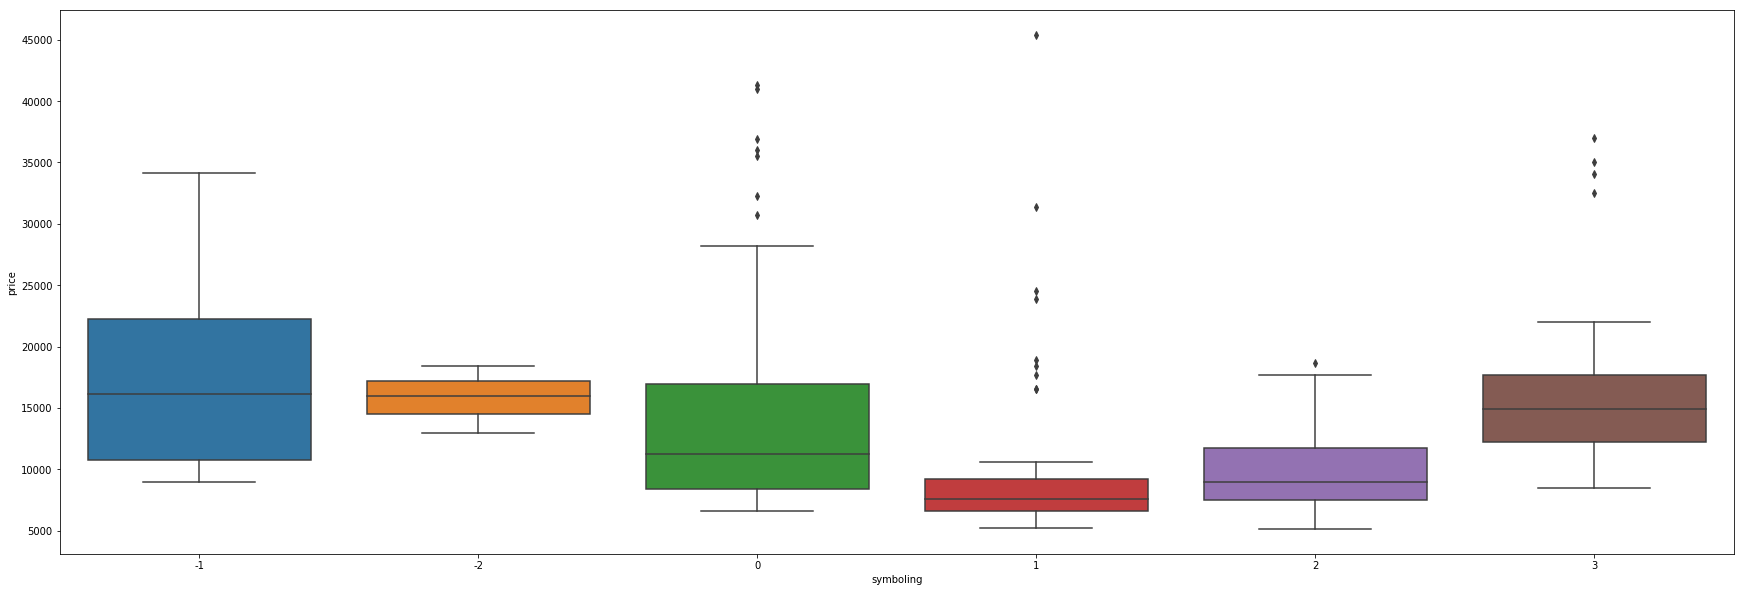

In [17]:
#Price range on risk factor
plt.figure(figsize=(30, 10))
sns.boxplot(x = 'symboling', y = 'price', data = car_data)
plt.show()

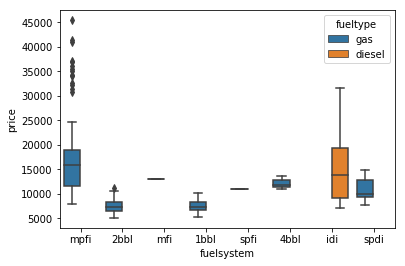

In [18]:
sns.boxplot(x = 'fuelsystem', y = 'price',hue='fueltype', data = car_data)
plt.show()

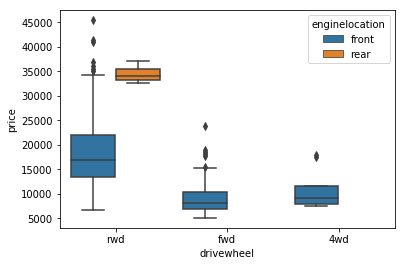

In [19]:
sns.boxplot(x = 'drivewheel', y = 'price',hue='enginelocation', data = car_data)
plt.show()

### 4. Data Preparation

#### 4.1 Derived metrics

Finding weight to power ratio:

In [20]:
#Taking backup
car_data1 = car_data.copy()
#car_data = car_data1

In [21]:
car_data['wtopower'] = car_data['curbweight']/car_data['horsepower']

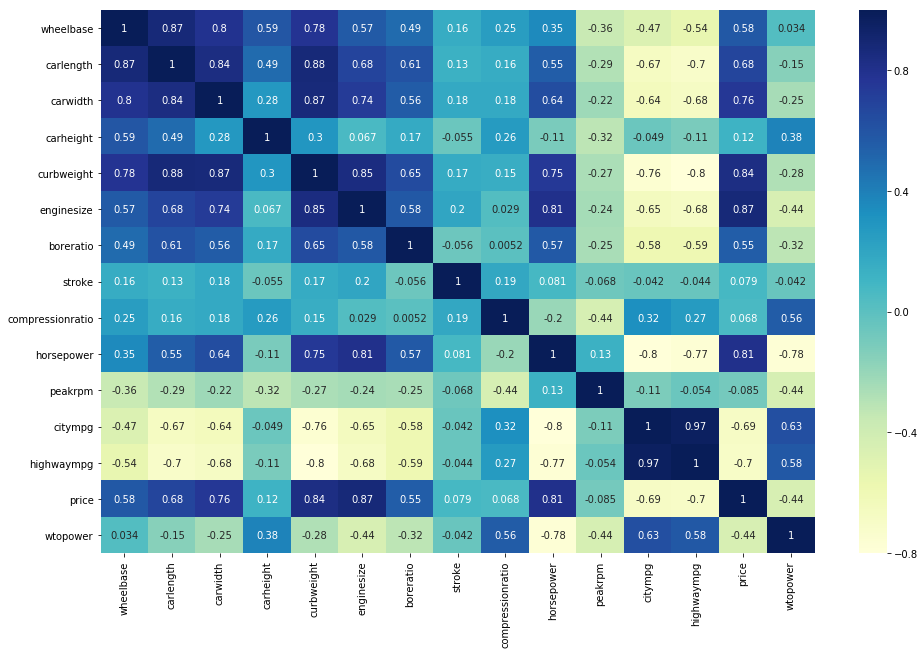

In [22]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

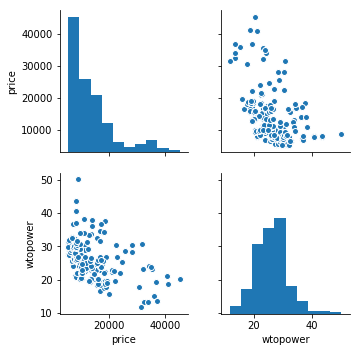

In [23]:
#Relation between new variable and price
sns.pairplot(car_data[['price','wtopower']])
plt.show()

Understanding features considering below correlation metrix:<br>
1. Features which are highly correlated with price
2. Features which are correlated with each indipendent variable

In [24]:
car_data2 = car_data.copy()

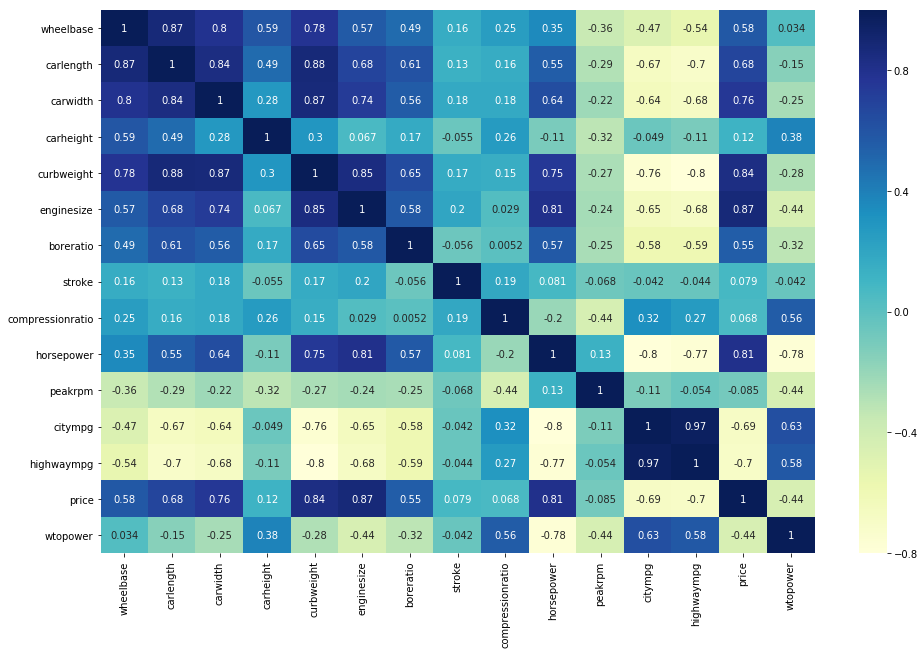

In [25]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_data2.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### 4.2 Creating Dummy variable for categorical variable:

Encoding for features with two categories:<br>
`fueltype`, `aspiration`, `doornumber`, `enginelocation`

In [26]:
car_data3 = car_data2.copy()

In [27]:
car_data3['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [28]:
car_data3.loc[car_data3['fueltype']=='gas','fueltype'] = 0
car_data3.loc[car_data3['fueltype']=='diesel','fueltype'] = 1

In [29]:
car_data3['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [30]:
car_data3.loc[car_data3['aspiration']=='std','aspiration'] = 0
car_data3.loc[car_data3['aspiration']=='turbo','aspiration'] = 1

In [31]:
car_data3['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [32]:
car_data3.loc[car_data3['doornumber']=='four','doornumber'] = 1
car_data3.loc[car_data3['doornumber']=='two','doornumber'] = 0

In [33]:
car_data3['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [34]:
car_data3.loc[car_data3['enginelocation']=='front','enginelocation'] = 0
car_data3.loc[car_data3['enginelocation']=='rear','enginelocation'] = 1

features with more than one categories:<br>
`company`, `carbody`, `drivewheel`, `enginetype`, `cylindernumber`, `fuelsystem`, `symboling`

In [35]:
car_data3['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [36]:
#Creating Dummy for cylindernumber
cylinder = pd.get_dummies(car_data3['cylindernumber'], drop_first = True)
car_data3 = pd.concat([car_data3, cylinder], axis = 1)
car_data3.drop('cylindernumber',axis=1,inplace=True)

In [37]:
#Creating Dummy for drivewheel
drivewheel = pd.get_dummies(car_data3['drivewheel'], drop_first = True)
car_data3 = pd.concat([car_data3, drivewheel], axis = 1)
car_data3.drop('drivewheel',axis=1,inplace=True)

In [38]:
#Creating Dummy for company
company = pd.get_dummies(car_data3['company'], drop_first = True)
car_data3 = pd.concat([car_data3, company], axis = 1)
car_data3.drop('company',axis=1,inplace=True)

In [39]:
#Creating Dummy for carbody
carbody = pd.get_dummies(car_data3['carbody'], drop_first = True)
car_data3 = pd.concat([car_data3, carbody], axis = 1)
car_data3.drop('carbody',axis=1,inplace=True)

In [40]:
#Creating Dummy forengine type
engine = pd.get_dummies(car_data3['enginetype'], drop_first = True)
car_data3 = pd.concat([car_data3, engine], axis = 1)
car_data3.drop('enginetype',axis=1,inplace=True)

In [41]:
#Creating Dummy for fuel system
fuel = pd.get_dummies(car_data3['fuelsystem'], drop_first = True)
car_data3 = pd.concat([car_data3, fuel], axis = 1)
car_data3.drop('fuelsystem',axis=1,inplace=True)

In [42]:
#giving meaning to symboling
car_data3.loc[car_data3['symboling']=='-3','symboling'] = 'High_Safe'
car_data3.loc[car_data3['symboling']=='-2','symboling'] = 'Med_Safe'
car_data3.loc[car_data3['symboling']=='-1','symboling'] = 'Low_Safe'
car_data3.loc[car_data3['symboling']=='0','symboling'] = 'Safe'
car_data3.loc[car_data3['symboling']=='1','symboling'] = 'Low_Risk'
car_data3.loc[car_data3['symboling']=='2','symboling'] = 'Med_Risk'
car_data3.loc[car_data3['symboling']=='3','symboling'] = 'High_Risk'

In [43]:
#Creating Dummy for symboling
symboling = pd.get_dummies(car_data3['symboling'], drop_first = True)
car_data3 = pd.concat([car_data3, symboling], axis = 1)
car_data3.drop('symboling',axis=1,inplace=True)

In [44]:
car_data3.shape

(205, 71)

In [45]:
car_data4 = car_data3.copy()

Lint of numerical variables for standardizing:<br>
['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','wtopower']

In [46]:
num_var = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','wtopower']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

car_data4[num_var] = scaler.fit_transform(car_data4[num_var])

#### 4.3 Test-Train Split

In [47]:
from sklearn.model_selection import train_test_split

car_train,car_test = train_test_split(car_data4,train_size=0.7,test_size=0.3,random_state=100)

#### 4.4 Spliting into Dependent and indipendent variables:

Preprocessing steps till now:<br>
Standard scaler on list of numerical variables

In [48]:
car_trainX = car_train.drop(['price'],axis=1)
car_trainy = car_train['price']

In [49]:
car_testX = car_test.drop(['price'],axis=1)
car_testy = car_test['price']

### 5. Model building

In [50]:
car_trainX.shape

(143, 70)

There are 70 features to start with modeling.<br>
Using RFE to reduce 70 independent variables to top 15 variable

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()
lm.fit(car_trainX,car_trainy)

rfe = RFE(lm,15)
rfe = rfe.fit(car_trainX,car_trainy)

In [53]:
car_trainX.columns[rfe.support_]

Index(['enginesize', 'five', 'four', 'three', 'twelve', 'two', 'audi', 'bmw',
       'buick', 'porsche', 'saab', 'volvo', 'l', 'ohcf', 'rotor'],
      dtype='object')

Using above listed variables for statistical analysis:
This model is further improved manually.

In [54]:
col_list = car_trainX.columns[rfe.support_]

In [55]:
car_trainX = car_train[col_list]

In [56]:
# Adding a constant variable 
import statsmodels.api as sm  
car_trainX = sm.add_constant(car_trainX)

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


First Model evaluation:

In [57]:
lm_1 = sm.OLS(car_trainy,car_trainX).fit()

In [58]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     93.85
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.70e-60
Time:                        22:20:32   Log-Likelihood:                -26.311
No. Observations:                 143   AIC:                             82.62
Df Residuals:                     128   BIC:                             127.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2461      0.113     -2.183      0.0

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = car_trainX.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
5,two,inf
14,rotor,inf
1,five,4.150000
6,audi,3.330000
0,enginesize,2.820000
8,buick,2.300000
2,four,1.910000
4,twelve,1.470000
12,l,1.350000
3,three,1.250000


Highly collinear features exists in the model. VIF value is infinite, that means r^2 must be 1<br>
1. two
2. rotor

In [60]:
#Dropping both variables
car_trainX.drop(['const','two','rotor'],axis=1,inplace=True)

Second model evaluation

In [61]:
# Adding a constant variable 
import statsmodels.api as sm  
car_trainX = sm.add_constant(car_trainX)
lm_2 = sm.OLS(car_trainy,car_trainX).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     83.05
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.66e-56
Time:                        22:20:40   Log-Likelihood:                -39.483
No. Observations:                 143   AIC:                             107.0
Df Residuals:                     129   BIC:                             148.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1639      0.086      1.904      0.0

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = car_trainX.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,five,4.14
5,audi,3.32
0,enginesize,2.47
7,buick,2.24
2,four,1.83
4,twelve,1.41
11,l,1.34
3,three,1.24
8,porsche,1.15
12,ohcf,1.15


`five` cylinder is insignificant.

In [63]:
#Dropping five from list
car_trainX.drop(['const','five'],axis=1,inplace=True)

Third model evaluation

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
car_trainX = sm.add_constant(car_trainX)
lm_3 = sm.OLS(car_trainy,car_trainX).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     90.17
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.56e-57
Time:                        22:20:46   Log-Likelihood:                -39.835
No. Observations:                 143   AIC:                             105.7
Df Residuals:                     130   BIC:                             144.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1490      0.084      1.775      0.0

Difference between AIC and BIC has decreased.

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = car_trainX.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.44
1,four,1.83
3,twelve,1.41
10,l,1.34
6,buick,1.30
2,three,1.24
7,porsche,1.15
11,ohcf,1.15
5,bmw,1.13
9,volvo,1.10


`ohcf` is insignificant.

In [66]:
#Dropping ohcf
car_trainX.drop(['const','ohcf'],axis=1,inplace=True)

Forth model evaluation

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
car_trainX = sm.add_constant(car_trainX)
lm_4 = sm.OLS(car_trainy,car_trainX).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     99.11
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.48e-58
Time:                        22:20:56   Log-Likelihood:                -39.845
No. Observations:                 143   AIC:                             103.7
Df Residuals:                     131   BIC:                             139.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1495      0.084      1.789      0.0

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = car_trainX.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.44
1,four,1.68
3,twelve,1.40
10,l,1.32
6,buick,1.30
2,three,1.24
5,bmw,1.13
7,porsche,1.13
9,volvo,1.10
8,saab,1.04


`twelve` is highly insignificant

In [69]:
car_trainX.drop(['const','twelve'],axis=1,inplace=True)

Fifth model evaluation

In [70]:
# Adding a constant variable 
import statsmodels.api as sm  
car_trainX = sm.add_constant(car_trainX)
lm_5 = sm.OLS(car_trainy,car_trainX).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.12e-59
Time:                        22:21:02   Log-Likelihood:                -39.864
No. Observations:                 143   AIC:                             101.7
Df Residuals:                     132   BIC:                             134.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.083      1.793      0.0

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = car_trainX.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.74
1,four,1.53
9,l,1.29
2,three,1.21
5,buick,1.21
4,bmw,1.10
6,porsche,1.09
8,volvo,1.08
7,saab,1.04
3,audi,1.00


`three` has become insignificant, dropping it.

In [72]:
#Dropping three cylinder variable
car_trainX.drop(['const','three'],axis=1,inplace=True)

Sixth model evaluation.

In [73]:
# Adding a constant variable 
import statsmodels.api as sm  
car_trainX = sm.add_constant(car_trainX)
lm_6 = sm.OLS(car_trainy,car_trainX).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.20e-59
Time:                        22:21:07   Log-Likelihood:                -41.799
No. Observations:                 143   AIC:                             103.6
Df Residuals:                     133   BIC:                             133.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0985      0.080      1.237      0.2

In [74]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = car_trainX.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.64
1,four,1.46
4,buick,1.20
8,l,1.10
3,bmw,1.09
5,porsche,1.08
7,volvo,1.07
6,saab,1.04
2,audi,1.00


All the variable is significantly contributing to the model. Low VIF value for all variable says low multicolliniarity.

In the above model we can see that:<br>
R^2 = 0.89 which is a very good value for model.<br>
Difference between R^2 and Adj R^2 is just 0.008.(Low multicolliniarity)<br>
Difference between AIC and BIC is 30 lowest than that of all other models.<br>
P-Value for all the independent variable is less than 0.05.<br>

List of variable in final model:<br>
1. enginesize
2. four
3. buick
4. l
5. bmw
6. porsche
7. volvo
8. saab
9. audi

### 6. Residual Analysis on Train data

In [75]:
#Predicted value for train dataset
y_pred = lm_6.predict(car_trainX)

Text(0.5,0,'Errors')

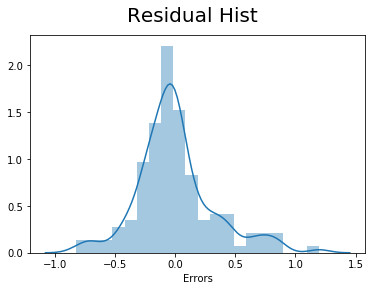

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((car_trainy - y_pred), bins = 20)
fig.suptitle('Residual Hist', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)   

We can see almost normal distribution on error, which confirms the model to be good.

Text(0.5,0,'Price')

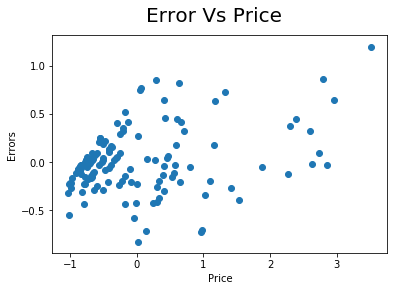

In [77]:
# Plot the scatter of the error terms/price
fig = plt.figure()
plt.scatter(car_trainy,car_trainy-y_pred)
fig.suptitle('Error Vs Price', fontsize = 20)                  # Plot heading 
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('Price', fontsize = 10) 

All the errors are randomly distributed over price.

Text(0.5,0,'Price')

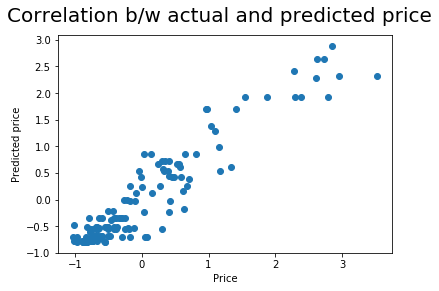

In [78]:
# Plot the scatter of the error terms/price
fig = plt.figure()
plt.scatter(car_trainy,y_pred)
fig.suptitle('Correlation b/w actual and predicted price', fontsize = 20)                  # Plot heading 
plt.ylabel('Predicted price', fontsize = 10)
plt.xlabel('Price', fontsize = 10) 

We can see a linear relation between predicted value and actual value.

### 7. Working on test data

In [79]:
#Selecting required variables for prediction on test data
car_test_X = car_testX[['enginesize','four','buick','l','porsche','bmw','volvo','saab','audi']]
car_test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 9 columns):
enginesize    62 non-null float64
four          62 non-null uint8
buick         62 non-null uint8
l             62 non-null uint8
porsche       62 non-null uint8
bmw           62 non-null uint8
volvo         62 non-null uint8
saab          62 non-null uint8
audi          62 non-null uint8
dtypes: float64(1), uint8(8)
memory usage: 1.5 KB


In [80]:
car_testX = sm.add_constant(car_test_X)

In [81]:
car_test_pred = lm_6.predict(car_testX)

In [82]:
#r2 score on test data
from sklearn.metrics import r2_score
r2_score(car_testy,car_test_pred)

0.8806739201529781

88% r2 score for test depicts a very accurate model to consider.

Text(0.5,0,'Price')

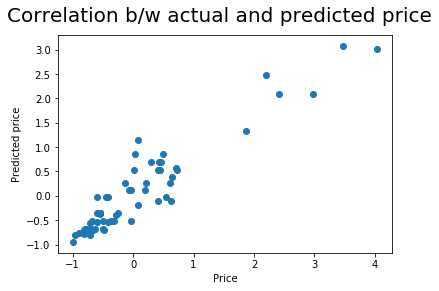

In [83]:
# Plot the scatter of the error Predicted price/Actual price
fig = plt.figure()
plt.scatter(car_testy,car_test_pred)
fig.suptitle('Correlation b/w actual and predicted price', fontsize = 20)                  # Plot heading 
plt.ylabel('Predicted price', fontsize = 10)
plt.xlabel('Price', fontsize = 10) 

Text(0.5,0,'Errors')

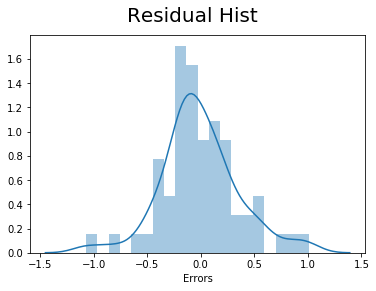

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((car_testy - car_test_pred), bins = 20)
fig.suptitle('Residual Hist', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)   

Error distribution on test dataset too gives a normal distribution. Which is a indication of good model.<br>
Dist peek lower than 0 says model is little under predicting the price on data.

### 8. Conclusion

Model built(Standardised numerical variables and non Standardised dummy variables are used):<br>
Price = 0.0985 + (0.5802\*enginesize) + (-0.383\*four) + (0.4489\*audi) + (1.0747\*bmw) + (1.048\*buick) + (1.242\*porsche) + (0.6242\*saab) + (0.6294\*volvo) + (0.3486\*l)

Explaination on the model:<br>
1. Companies like BMW, Volvo, Porsche, Saab, Audi, Buick have major chunk of expnsive cars. The positive coef with price explains it clearly.<br>
2. Price is highly dependent on `Engine size`. High and +ve coef gives this insight.<br>
3. `Four` cylinder engines are non expensive. -ve coef explains it.
4. Engine type `L` positively impacts the price and used in expensive cars. +ve coef shows the same.

Insights for Geely Auto:
1. Now we know the list of compititors for high range cars and low range cars.
2. Altering Engine size can result in changing price range. Higher engine size with lower price than high range compititors can help sales.
3. L type engine are expensive in market.
4. Four cylinder engines are commonly used for low range cars.